In [1]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from sentence_transformers import SentenceTransformer

In [3]:
tweets = pd.read_csv("../../tweets.csv", index_col=None)
tweets

,bookmark_count,created_at,favorite_count,full_text,id_str,lang,possibly_sensitive,quote_count,reply_count,retweet_count,user_id_str,screen_name,retweet-screen_name,retweet-location,qoute-screen_name,qoute-location
0,0,Thu Nov 10 00:52:25 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | La embajad...,1590507635992039426,es,NaN,0,0,56,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN
1,0,Thu Nov 10 00:52:17 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | El donativ...,1590507601376456706,es,NaN,0,0,59,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN
2,0,Thu Nov 10 00:52:12 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | La embajad...,1590507582455975937,es,NaN,0,0,54,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN
3,0,Thu Nov 10 00:51:57 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | “En la act...,1590507519704592384,es,NaN,0,0,53,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN
4,0,Thu Nov 10 00:51:44 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | “Hecho que...,1590507465376149505,es,NaN,0,0,49,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18818,0,Thu Nov 16 07:51:13 +0000 2023,11,The meeting between Chinese President Xi Jinpi...,1725058929074520161,en,False,0,1,7,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN
18819,0,Thu Nov 16 07:30:46 +0000 2023,3,"Xi on perceiving, conceiving China-U.S. relati...",1725053783363985462,en,False,0,2,2,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN
18820,1,Thu Nov 16 07:00:17 +0000 2023,7,Friendly groups in the United States gave a we...,1725046112086831397,en,False,0,1,2,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN
18821,0,Thu Nov 16 06:51:44 +0000 2023,2,The United Nations Security Council adopted a ...,1725043958106259522,en,False,0,1,1,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN


In [4]:
english_tweets = tweets[tweets["lang"] == "en"]
english_tweets

,bookmark_count,created_at,favorite_count,full_text,id_str,lang,possibly_sensitive,quote_count,reply_count,retweet_count,user_id_str,screen_name,retweet-screen_name,retweet-location,qoute-screen_name,qoute-location
20,0,Fri Feb 24 09:04:30 +0000 2017,2,China suspends import of coal from North Korea...,835052774316371968,en,False,0,0,0,813204650484604928,theChinaMosaic,NaN,NaN,NaN,NaN
21,0,Wed Feb 15 01:40:17 +0000 2017,0,It's time Tsai stopped playing little tricks. ...,831679494347841536,en,False,0,0,0,813204650484604928,theChinaMosaic,NaN,NaN,NaN,NaN
22,0,Tue Feb 14 01:52:04 +0000 2017,0,'Belt and Road' gives lift to China's ties wit...,831320071184060416,en,False,0,0,0,813204650484604928,theChinaMosaic,NaN,NaN,NaN,NaN
23,0,Thu Feb 09 05:21:34 +0000 2017,0,China and the Middle East - a rapidly changing...,829560854249095169,en,False,0,0,0,813204650484604928,theChinaMosaic,NaN,NaN,NaN,NaN
24,0,Tue Feb 07 09:41:22 +0000 2017,0,Video: Why does Japanese embassy act like a sp...,828901457495625728,en,False,0,0,0,813204650484604928,theChinaMosaic,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18818,0,Thu Nov 16 07:51:13 +0000 2023,11,The meeting between Chinese President Xi Jinpi...,1725058929074520161,en,False,0,1,7,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN
18819,0,Thu Nov 16 07:30:46 +0000 2023,3,"Xi on perceiving, conceiving China-U.S. relati...",1725053783363985462,en,False,0,2,2,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN
18820,1,Thu Nov 16 07:00:17 +0000 2023,7,Friendly groups in the United States gave a we...,1725046112086831397,en,False,0,1,2,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN
18821,0,Thu Nov 16 06:51:44 +0000 2023,2,The United Nations Security Council adopted a ...,1725043958106259522,en,False,0,1,1,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN


In [5]:
hashtags = pd.read_csv("../../hashtags.csv", index_col=None)
hashtags

,id_str,user_id_str,screen_name,hashtag
0,1590507635992039426,1033920834409312256,oujianhong,DonativoDeChina
1,1590507601376456706,1033920834409312256,oujianhong,DonativoDeChina
2,1590507582455975937,1033920834409312256,oujianhong,DonativoDeChina
3,1590507519704592384,1033920834409312256,oujianhong,DonativoDeChina
4,1590507465376149505,1033920834409312256,oujianhong,DonativoDeChina
...,...,...,...,...
17439,1725117378676338976,2985114866,CCTV_Plus,APEC2023
17440,1725075727215886818,2985114866,CCTV_Plus,APEC2023
17441,1725053783363985462,2985114866,CCTV_Plus,APEC2023
17442,1725046112086831397,2985114866,CCTV_Plus,APEC2023


In [16]:
canis_df = pd.read_csv("../../data/CANIS_PRC_state_media_on_social_media_platforms-2023-11-03.csv", index_col=None)
# canis_df = canis_df[canis_df["X (Twitter) handle"].isna() == False]
canis_df.columns

Index(['Name (English)', 'Region of Focus', 'Language',
       'Entity owner (English)', 'Parent entity (English)',
       'X (Twitter) handle', 'X (Twitter) URL', 'X (Twitter) Follower #',
       'Facebook page', 'Facebook URL', 'Facebook Follower #',
       'Instragram page', 'Instagram URL', 'Instagram Follower #',
       'Threads account', 'Threads URL', 'Threads Follower #',
       'YouTube account', 'YouTube URL', 'YouTube Subscriber #',
       'TikTok account', 'TikTok URL', 'TikTok Subscriber #'],
      dtype='object')

In [8]:
result = pd.merge(canis_df, hashtags, left_on='X (Twitter) handle', right_on='screen_name')
result

,Name (English),Region of Focus,Language,Entity owner (English),Parent entity (English),X (Twitter) handle,X (Twitter) URL,X (Twitter) Follower #,Facebook page,Facebook URL,...,YouTube account,YouTube URL,YouTube Subscriber #,TikTok account,TikTok URL,TikTok Subscriber #,id_str,user_id_str,screen_name,hashtag
0,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,itsAbby,https://www.youtube.com/itsAbby,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0,1721817501619896488,2693415903,_bubblyabby_,Gaza
1,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,itsAbby,https://www.youtube.com/itsAbby,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0,1721817501619896488,2693415903,_bubblyabby_,Ukraine️
2,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,itsAbby,https://www.youtube.com/itsAbby,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0,1721817501619896488,2693415903,_bubblyabby_,Israel
3,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,itsAbby,https://www.youtube.com/itsAbby,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0,1721817501619896488,2693415903,_bubblyabby_,Palestine
4,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,itsAbby,https://www.youtube.com/itsAbby,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0,1721331567686295868,2693415903,_bubblyabby_,Palestine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17074,Zhao Lijian,Anglosphere,English,Ministry of Foreign Affairs,Ministry of Foreign Affairs,zlj517,https://twitter.com/zlj517,1900000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1610607888430698497,141627220,zlj517,COVID19
17075,Zhao Lijian,Anglosphere,English,Ministry of Foreign Affairs,Ministry of Foreign Affairs,zlj517,https://twitter.com/zlj517,1900000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1610607598402953218,141627220,zlj517,Fireworks
17076,Zhao Lijian,Anglosphere,English,Ministry of Foreign Affairs,Ministry of Foreign Affairs,zlj517,https://twitter.com/zlj517,1900000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1610607480626896896,141627220,zlj517,Beijing
17077,Zhao Lijian,Anglosphere,English,Ministry of Foreign Affairs,Ministry of Foreign Affairs,zlj517,https://twitter.com/zlj517,1900000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1610607480626896896,141627220,zlj517,NewYear


In [9]:
hashtags_count = hashtags['hashtag'].value_counts()
hashtags_count

China                       1261
XiJinping                    236
APEC                         230
APEC2023                     170
CIIE                         165
                            ... 
Kashi                          1
July1                          1
MunichSecurityConference       1
SundayMorning                  1
bordersecurity                 1
Name: hashtag, Length: 4796, dtype: int64

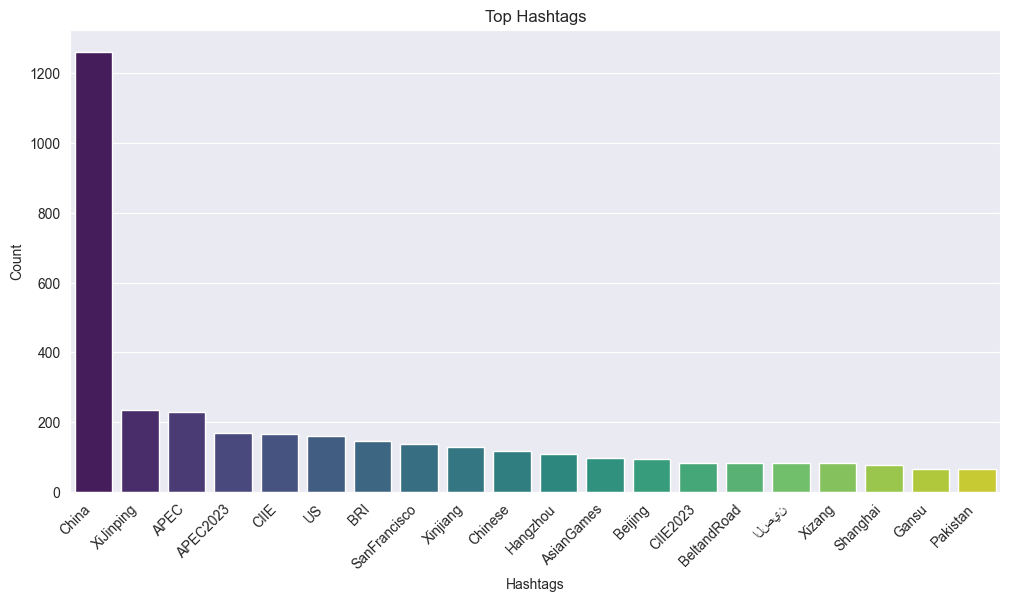

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=hashtags_count.head(20).index, y=hashtags_count.head(20).values, palette='viridis')
plt.title('Top Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_4495/2195367043.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=canis_df[social_media_columns], ci=None)


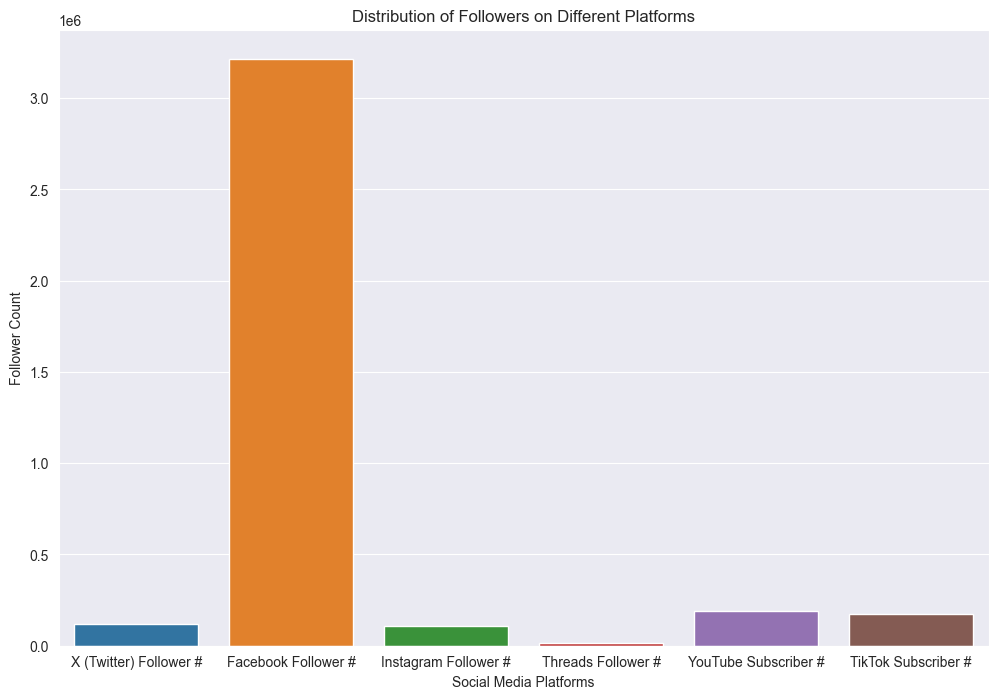

In [17]:
social_media_columns = ['X (Twitter) Follower #', 'Facebook Follower #', 'Instagram Follower #', 'Threads Follower #', 'YouTube Subscriber #', 'TikTok Subscriber #']

# Convert the follower columns to numeric (remove commas and convert to int)
# for col in social_media_columns:
#     canis_df[col] = pd.to_numeric(canis_df[col].str.replace(',', ''), errors='coerce')

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=canis_df[social_media_columns], ci=None)
plt.title('Distribution of Followers on Different Platforms')
plt.xlabel('Social Media Platforms')
plt.ylabel('Follower Count')
plt.show()

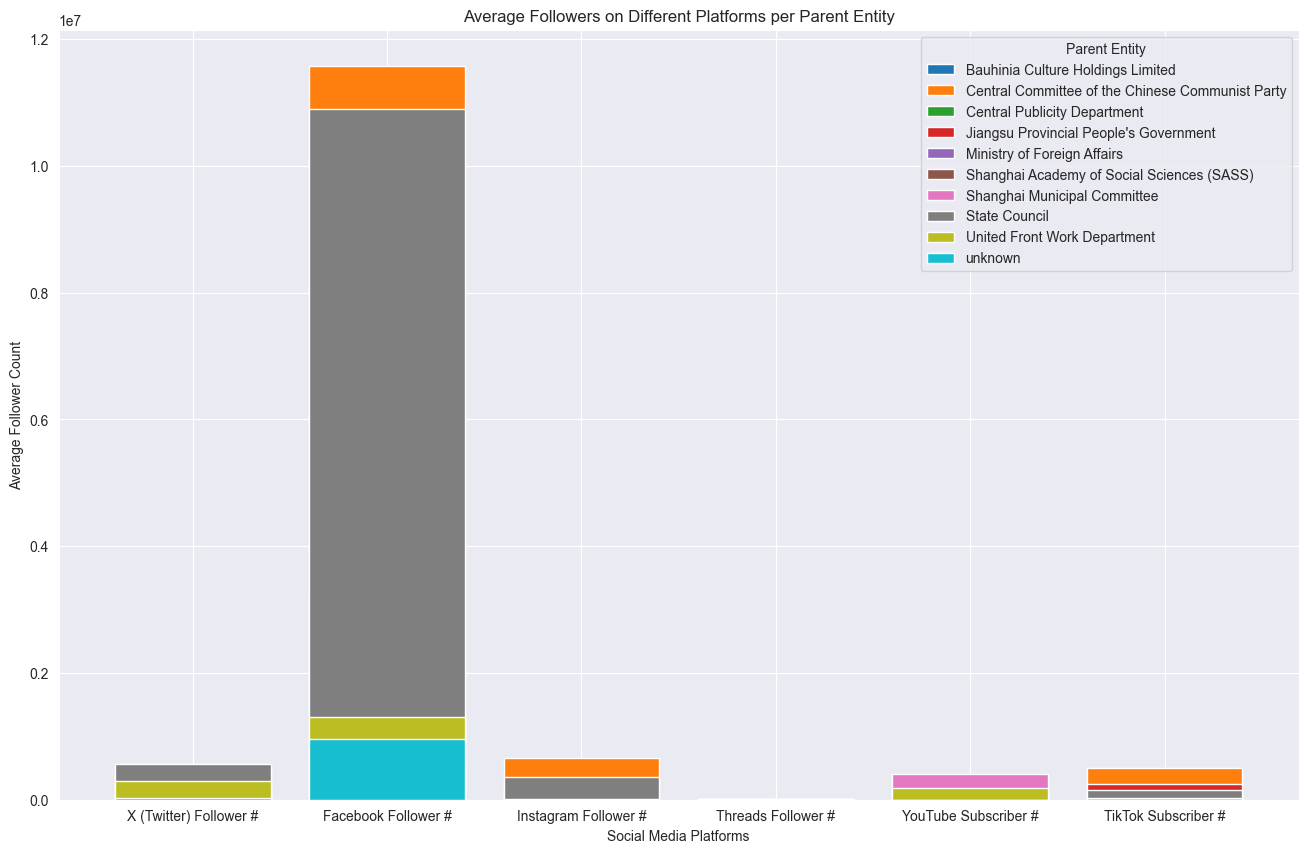

In [18]:
plt.figure(figsize=(16, 10))
top_10_entities = canis_df['Parent entity (English)'].value_counts().head(10).keys()
 # = canis_df.groupby('Parent entity (English)')['Total Followers'].sum().nlargest(10).index
df_top_10 = canis_df[canis_df['Parent entity (English)'].isin(top_10_entities)]

for parent_entity, group in df_top_10.groupby('Parent entity (English)'):
    plt.bar(social_media_columns, group[social_media_columns].mean(), label=parent_entity)

plt.title('Average Followers on Different Platforms per Parent Entity')
plt.xlabel('Social Media Platforms')
plt.ylabel('Average Follower Count')
plt.legend(title='Parent Entity')
plt.show()

/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_4495/2236829853.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Total Followers', y='Parent entity (English)', data=canis_df_top_10, ci=None)


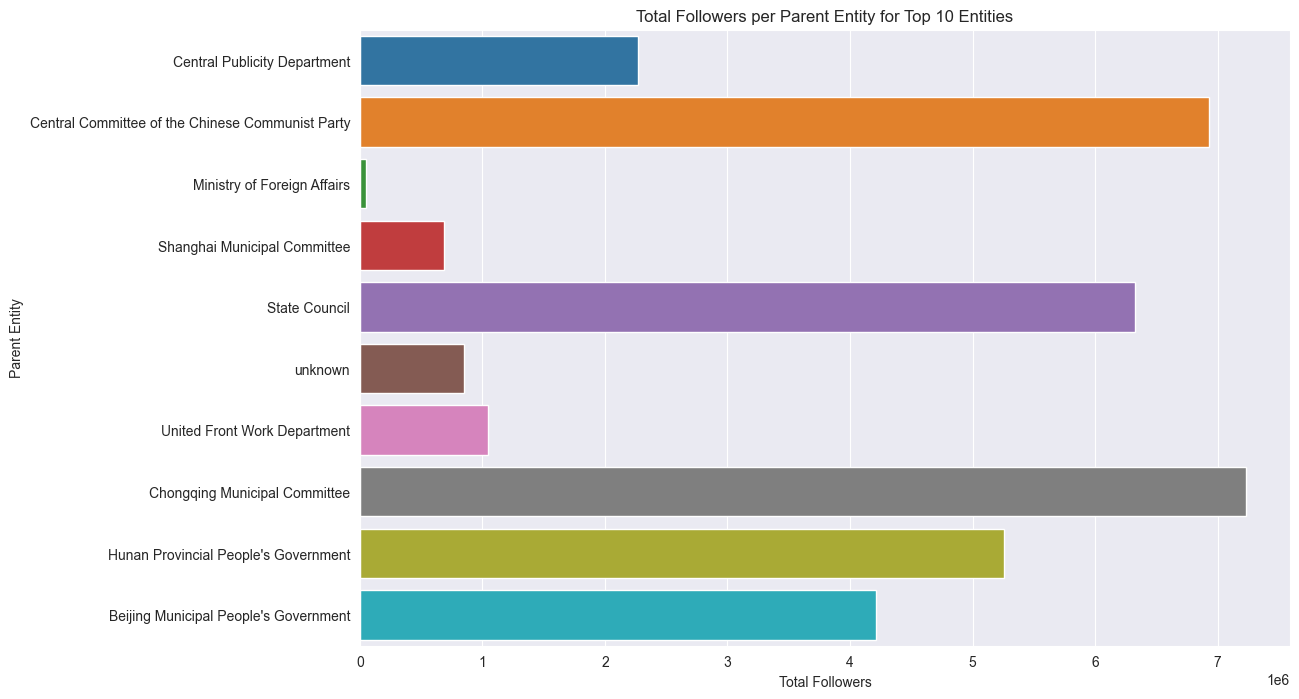

In [23]:
social_media_columns = ['X (Twitter) Follower #', 'Facebook Follower #', 'Instagram Follower #', 'Threads Follower #', 'YouTube Subscriber #', 'TikTok Subscriber #']
canis_df['Total Followers'] = canis_df[social_media_columns].sum(axis=1)
top_10_entities = canis_df.groupby('Parent entity (English)')['Total Followers'].sum().nlargest(10).index
canis_df_top_10 = canis_df[canis_df['Parent entity (English)'].isin(top_10_entities)]

# Plot a bar chart for total followers per parent entity
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Followers', y='Parent entity (English)', data=canis_df_top_10, ci=None)

plt.title('Total Followers per Parent Entity for Top 10 Entities')
plt.xlabel('Total Followers')
plt.ylabel('Parent Entity')
plt.show()

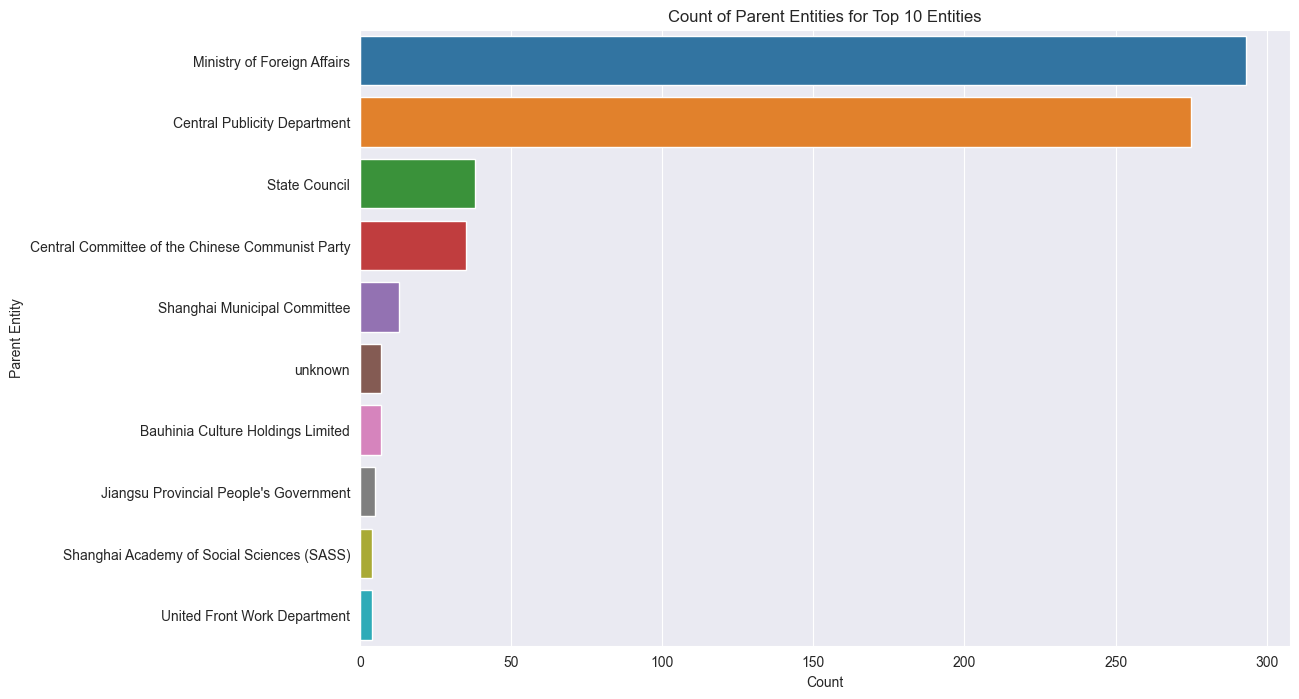

In [21]:
top_10_entities = canis_df['Parent entity (English)'].value_counts().nlargest(10).index

df_top_10 = canis_df[canis_df['Parent entity (English)'].isin(top_10_entities)]

# Plot a countplot for the top 10 parent entities
plt.figure(figsize=(12, 8))
sns.countplot(y='Parent entity (English)', data=df_top_10, order=top_10_entities)

plt.title('Count of Parent Entities for Top 10 Entities')
plt.xlabel('Count')
plt.ylabel('Parent Entity')
plt.show()


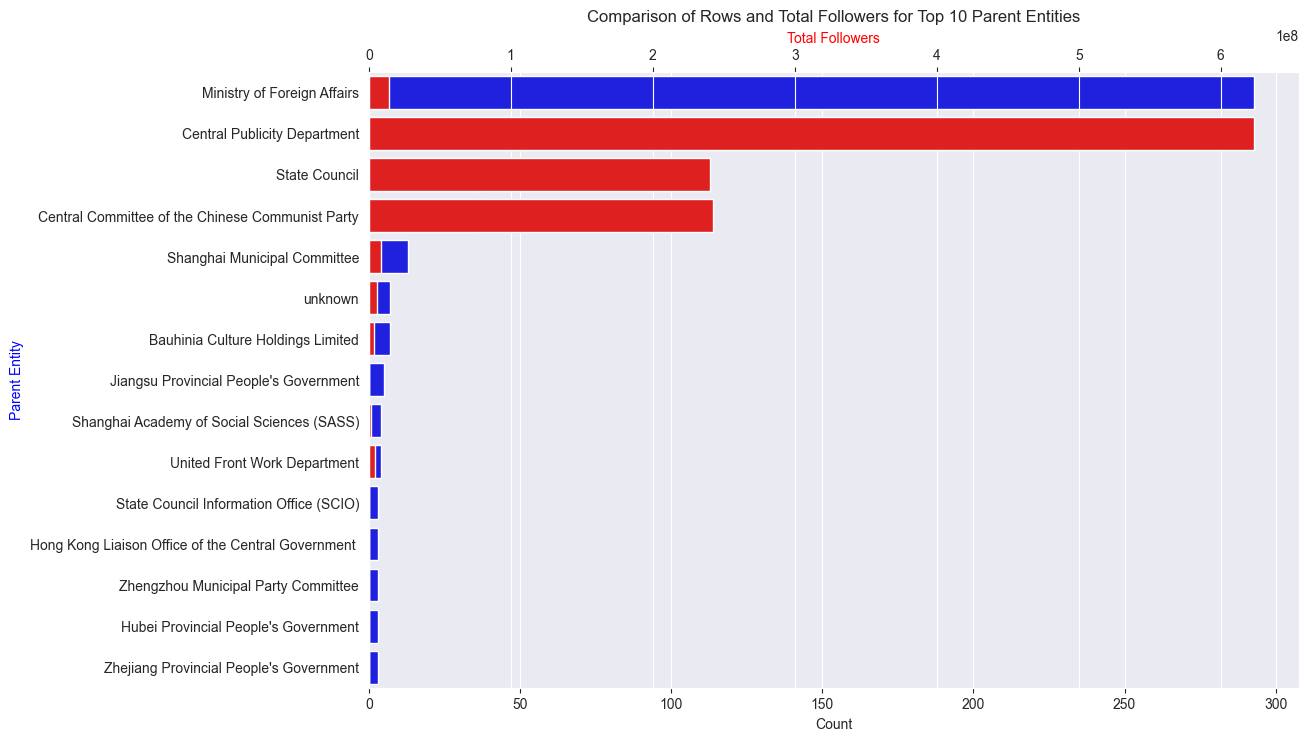

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 parent entities based on the count
top_10_entities = canis_df['Parent entity (English)'].value_counts().nlargest(15).index

# Filter the DataFrame for the top 10 entities
df_top_10 = canis_df[canis_df['Parent entity (English)'].isin(top_10_entities)]

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for the count of rows
sns.countplot(y='Parent entity (English)', data=df_top_10, order=top_10_entities, ax=ax1, color='b')
ax1.set_xlabel('Count')
ax1.set_ylabel('Parent Entity', color='b')

# Create a second y-axis to plot total followers
ax2 = ax1.twiny()
sns.barplot(x='Total Followers', y='Parent entity (English)', data=df_top_10.groupby('Parent entity (English)')['Total Followers'].sum().reset_index(), order=top_10_entities, ax=ax2, color='r')
ax2.set_xlabel('Total Followers', color='r')

plt.title('Comparison of Rows and Total Followers for Top 10 Parent Entities')
plt.show()


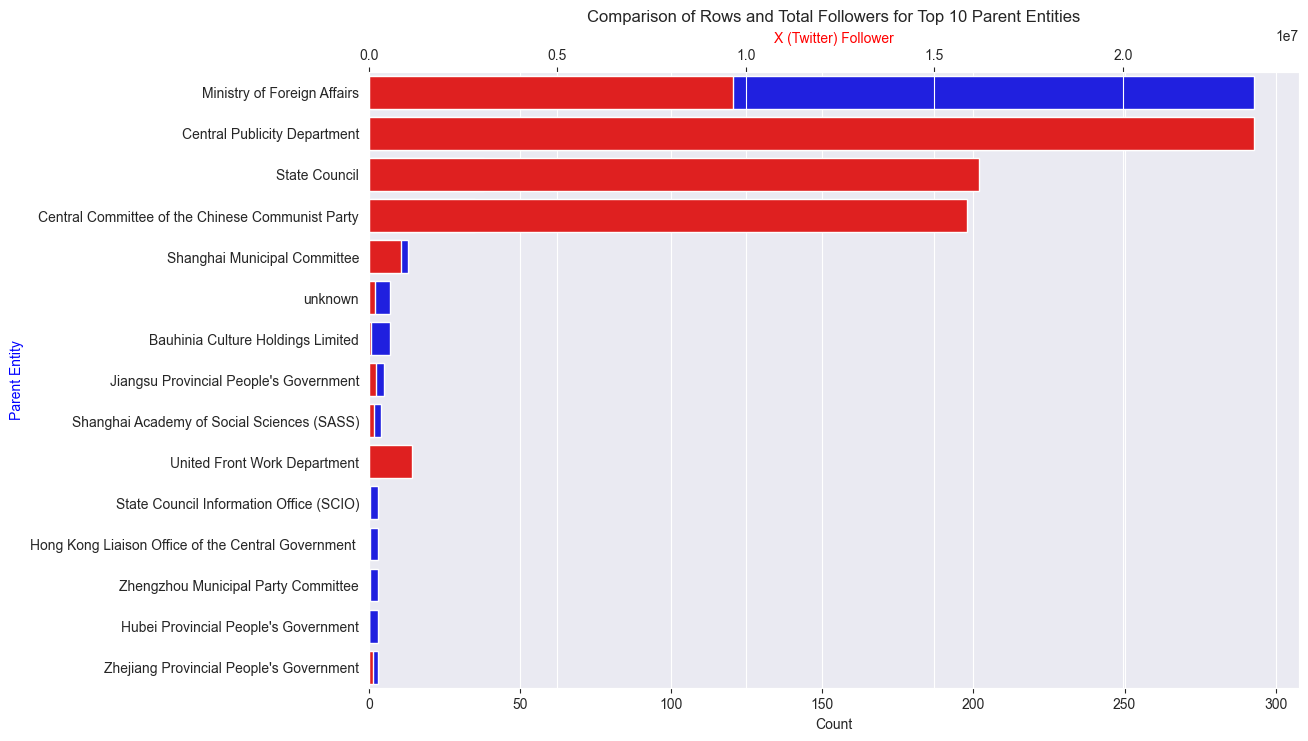

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 parent entities based on the count
top_10_entities = canis_df['Parent entity (English)'].value_counts().nlargest(15).index

# Filter the DataFrame for the top 10 entities
df_top_10 = canis_df[canis_df['Parent entity (English)'].isin(top_10_entities)]

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for the count of rows
sns.countplot(y='Parent entity (English)', data=df_top_10, order=top_10_entities, ax=ax1, color='b')
ax1.set_xlabel('Count')
ax1.set_ylabel('Parent Entity', color='b')

# Create a second y-axis to plot total followers
ax2 = ax1.twiny()
sns.barplot(x='X (Twitter) Follower #', y='Parent entity (English)', data=df_top_10.groupby('Parent entity (English)')['X (Twitter) Follower #'].sum().reset_index(), order=top_10_entities, ax=ax2, color='r')
ax2.set_xlabel('X (Twitter) Follower', color='r')

plt.title('Comparison of Rows and Total Followers for Top 10 Parent Entities')
plt.show()


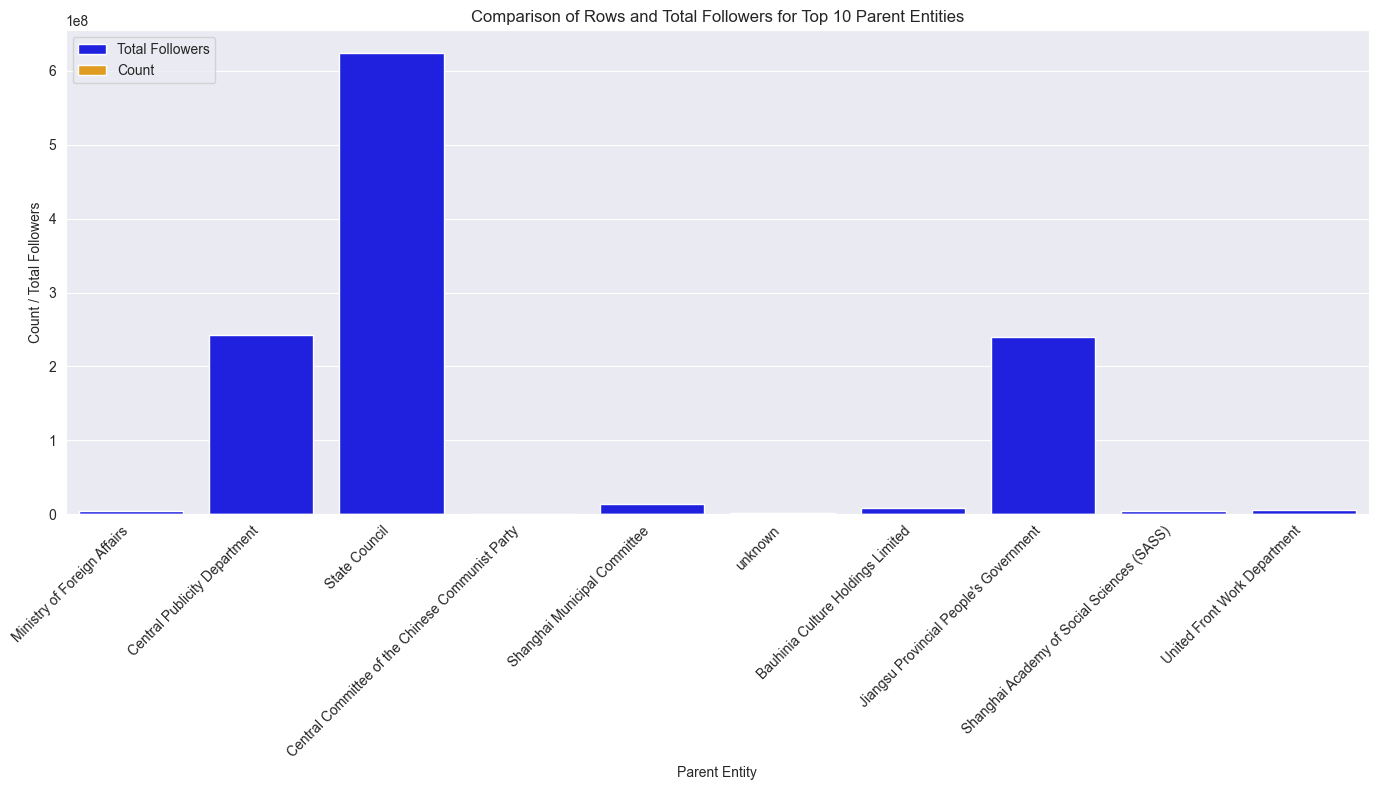

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df

# Get the top 10 parent entities based on the count
top_10_entities = canis_df['Parent entity (English)'].value_counts().nlargest(10).index

# Filter the DataFrame for the top 10 entities
df_top_10 = canis_df[canis_df['Parent entity (English)'].isin(top_10_entities)]

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 8))

# Grouped bar plot for count of rows and total followers
sns.barplot(x='Parent entity (English)', y='Total Followers', data=df_top_10.groupby('Parent entity (English)')['Total Followers'].sum().reset_index(), color='blue', ax=ax, label='Total Followers')
sns.barplot(x='Parent entity (English)', y='Count', data=df_top_10['Parent entity (English)'].value_counts().reset_index().rename(columns={'index': 'Parent entity (English)', 'Parent entity (English)': 'Count'}), color='orange', ax=ax, label='Count')

ax.set_xlabel('Parent Entity')
ax.set_ylabel('Count / Total Followers')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.title('Comparison of Rows and Total Followers for Top 10 Parent Entities')
plt.tight_layout()
plt.legend(loc='upper left')  # Add legend
plt.show()


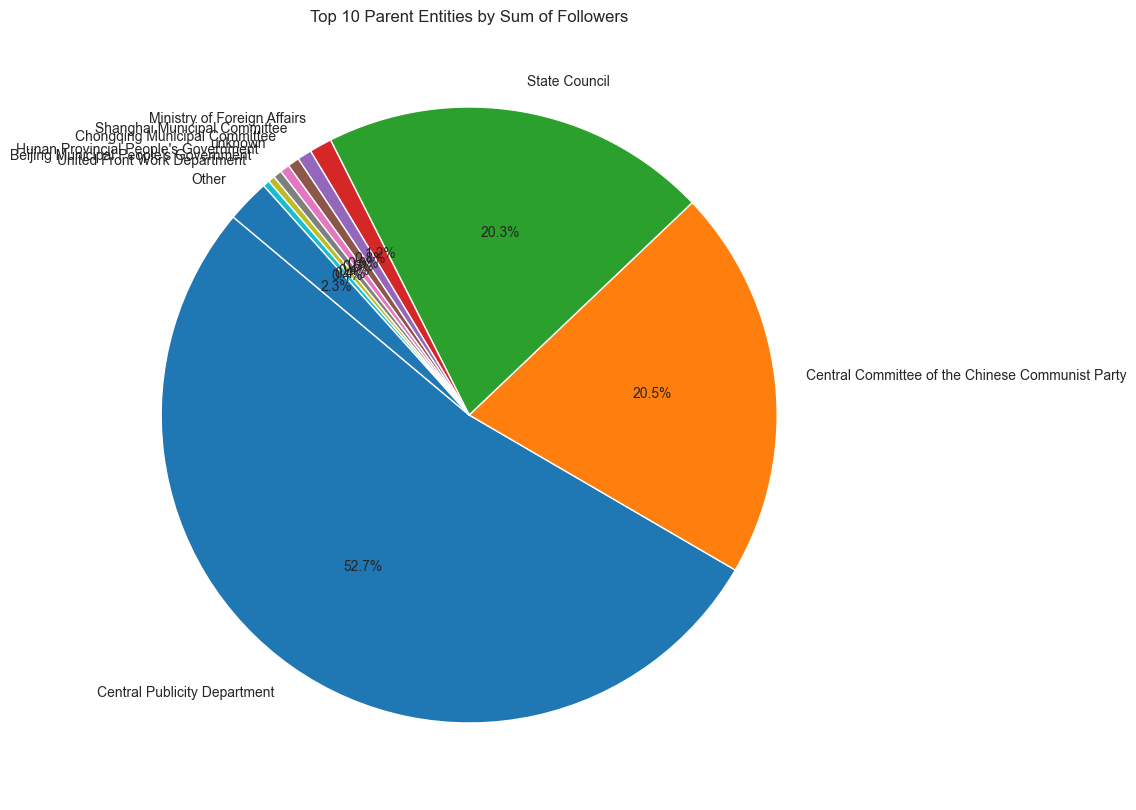

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df

# Group by parent entity and calculate the sum of followers
sum_followers_per_entity = canis_df.groupby('Parent entity (English)')['Total Followers'].sum()

# Select the top 10 entities
top_10_entities = sum_followers_per_entity.nlargest(10)

# Create a new DataFrame with the top 10 and an "Other" category
top_entities_df = pd.DataFrame({'Parent entity (English)': top_10_entities.index, 'Total Followers': top_10_entities.values})
other_df = pd.DataFrame({'Parent entity (English)': ['Other'], 'Total Followers': [sum_followers_per_entity.sum() - top_10_entities.sum()]})
combined_df = pd.concat([top_entities_df, other_df])

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(combined_df['Total Followers'], labels=combined_df['Parent entity (English)'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Parent Entities by Sum of Followers')
plt.show()
